# 实例11.1-tensorflow实现一元逻辑回归

In [95]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

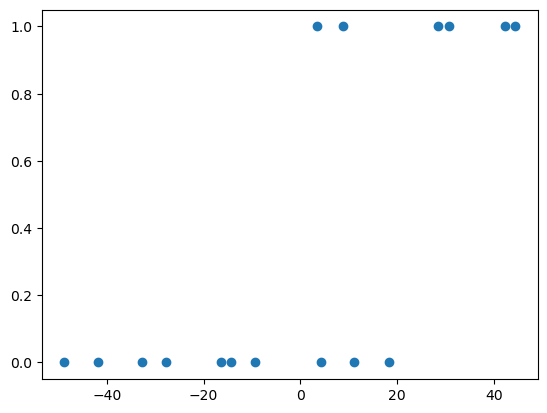

In [96]:
x=np.array([
    137.97, 104.50, 100.00, 126.32,
    79.20,  99.00,  124.00, 114.00,
    106.69, 140.05, 53.75,  46.91,
    68.00,  63.02,  81.26,  86.21
])
y=np.array([
    1,  1,  0,  1,
    0,  1,  1,  0,
    0,  1,  0,  0,
    0,  0,  0,  0
])

x_train=x-np.mean(x)
y_train=y
plt.scatter(x_train,y_train)

learn_rate=0.005
iter=5
display_step=1

np.random.seed(612)
w=tf.Variable(np.random.randn())
b=tf.Variable(np.random.randn())

i: 0, Train Loss: 0.852807, Accuracy: 0.625000
i: 1, Train Loss: 0.400259, Accuracy: 0.875000
i: 2, Train Loss: 0.341504, Accuracy: 0.812500
i: 3, Train Loss: 0.322571, Accuracy: 0.812500
i: 4, Train Loss: 0.313972, Accuracy: 0.812500
i: 5, Train Loss: 0.309411, Accuracy: 0.812500


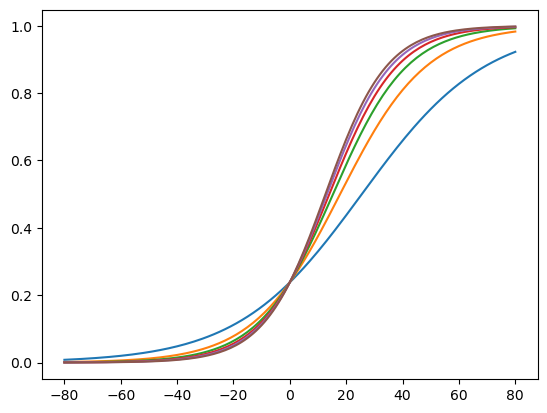

In [97]:
cross_train=[]
acc_train=[]

x_=np.array(list(range(-80,81)))
for i in range(0,iter+1):
    with tf.GradientTape() as tape:
        pred_train=1/(1+tf.exp(-(w*x_train+b)))
        Loss_train=-tf.reduce_mean(y_train*tf.math.log(pred_train)+(1-y_train)*tf.math.log(1-pred_train))
        Accuracy_train=tf.reduce_mean(tf.cast(tf.equal(tf.where(pred_train<0.5,0,1),y_train),tf.float32))
    cross_train.append(Loss_train)
    acc_train.append(Accuracy_train)
    
    dL_dw,dL_db=tape.gradient(Loss_train,[w,b])
    
    w.assign_sub(learn_rate*dL_dw)
    b.assign_sub(learn_rate*dL_db)
    
    if i%display_step==0:
        print("i: %i, Train Loss: %f, Accuracy: %f"%(i,Loss_train,Accuracy_train))
        y_=1/(1+tf.exp(-(w*x_+b)))
        plt.plot(x_,y_)

In [98]:
x_test=[128.15,45.00,141.43,106.27,99.00,53.84,85.36,70.00,162.00,114.60]

pred_test=1/(1+tf.exp(-(w*(x_test-np.mean(x)+b))))

y_test=tf.where(pred_test<0.5,0,1)

for i in range(len(x_test)):
    print(x_test[i],'\t',pred_test[i].numpy(),'\t',y_test[i].numpy(),'\t')

128.15 	 0.9467722 	 1 	
45.0 	 0.008440434 	 0 	
141.43 	 0.98368824 	 1 	
106.27 	 0.7040904 	 1 	
99.0 	 0.54945207 	 1 	
53.84 	 0.018826108 	 0 	
85.36 	 0.2581531 	 0 	
70.0 	 0.07814859 	 0 	
162.0 	 0.9975042 	 1 	
114.6 	 0.83653975 	 1 	
